# Exploratory Data Analysis

## 1. Setup

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from summarytools import dfSummary

from env_setup import *
from functions.t_test import *

pd.set_option('display.max_columns', None)

In [45]:
# Load data
df_raw = pd.read_csv(datachurn)
df_raw.head()
df_ori = df_raw.copy()

## 2. EDA
### 2.1. Data quality checks
- No duplicates
- Dataset imbalanced. Churned 28.1% vs 71.9%
- `TransactionDate` to be converted to integer

In [46]:
# Extract days from TransactionDate
df_ori['TransactionDate'] = df_ori['TransactionDate'].str.extract(r"([0-9]+)").astype(int)

In [47]:
# View summaries
dfSummary(df_ori)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int64],Mean (sd) : 49973.7 (28875.3)min < med < max:1.0 < 49977.0 < 100000.0IQR (CV) : 50008.0 (1.7),"100,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZklEQVR4nO3Yva/SUBjH8ecA9+bwYhtehK2Lo4kDCQuLm6N/rKsjCSTODC5OLISEQAn1EhrE4eoKtPVSf/r9zH162pPvKQnufD4b8LerlP0AwC1q1y5wztXN7DHn/Y/n8/kp5+x/qeB+m/2je34xVOdcvdvtfgyCoJ3n5tvtdu+c+2xmh1xP9/zF/1HCbFlr+06n8yEMw2bOdW23222cc5/yxPoHDkmRPbt4wK59UR+DIGiPx+OnMAwzxbZcLl/NZrP3URT1qtVq5lBPp9NDkiRvWq3Wt0qlkt5rtsy10zT1ZvZ2NBp96fV6u0wPbWZxHPvJZNJfr9c951zW+UKHpOieXztgV3/6zczCMDz0+/3vWRbebDZ1731jOBweBoPBJsusmdlisWjP5/PXw+Hwa9b5IrNlrv1rtuG9T7Put5lZkiQPaZq+i6KomvXjUPSQFHnvOI79dDptr9frRzPLH2oRzWYzc+Rmz6HnnS8yW+bav2fzOh6Ptbwfh6KHpOiem9nFd3/xUHF/ZRySl8bfU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBQu+WiOI591hvv93tvZpYkiV+tVo17zquurfrcRedv6esnVqVCl4UsRRAAAAAASUVORK5CYII="">",0(0.0%)
2,Age[int64],Mean (sd) : 43.5 (15.0)min < med < max:18.0 < 43.0 < 69.0IQR (CV) : 25.0 (2.9),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACq0lEQVR4nO3ZsU8aYRjH8ecF0Rehd0EpbiwdTTqQuLB0c+wf27WbgyadGbp0cjEm5oRwlXAedKimQxPh3vOAH/l+Zh7e986voPe65XJpwK6rbXsDwDoOVr3AOdc0s8PA958vl8unwFmIqbKVN0N1zjVPT0+/RlHUCVl5MpkkzrlvxLr/qm5l1SfqYRRFneFw+BTH8azIwuPx2F9fX3ceHh4OzYxQ91+lraz86jczi+N41uv1fhdZ/EUzYAbCqmqFf6YggVAhgVAhgVAhgVAhgVAhYa3HU4pKnpKY/f0lXgTObu1Ebl9PEnc61BI33Z+cnFzGcdwKWTfP80aapp/a7favWq2WFZ1/fHycOue+m1mhB98vgmMpezpUct/RYrFohKy7jkpDzfO8YWaRcy5kPDi2LMu8mZ1fXFz86Ha7k6Lzt7e3ndFo9HEwGPw8OztLisze3d19uLm5+dLv97v1er3wD7xsLO12uzccDidFT4fK7jvLMp/n+flsNrsys5AH/m+qLNQ0TRtZln3u9/v10Au3wNheQjv23mchpyRJkjTNzFqtVuFTliRJmt7748FgMNt05K+xHB0dXW1y32b/7vnz83O96Ow6Kgt1Pp8fvMeFh8T2Gto2bTpys/eJJWTfZtXf88r/Rt3VC99l3LP/8XgKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEg7WedF4PPZF33g6nXozszRN/f39/fEm51XXVt132fl1+voDIipWFKKxhGsAAAAASUVORK5CYII="">",0(0.0%)
3,Gender[object],1. Female2. Male,"501,230 (50.2%)496,401 (49.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
4,Income[int64],Mean (sd) : 60189.7 (23043.0)min < med < max:20000.0 < 60262.0 < 99999.0IQR (CV) : 39679.0 (2.6),"57,178 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACgUlEQVR4nO3Yv2/aQBiH8fcgCUegtvhRsrF0jNQBiYWlW8f+sV27FQmkzgxdOrEgJAuMcIMwlA5VpUwE27Tki57PzMsd+OEMuMPhYMBrV7r0BoBT3Fx6Azgv51zVzO5yjm8Ph8PTOfdzLoR6RZxz1Var9SkIgkae+dVqtXDOfX6NsV5tqAVPFrM/X4t+ic0G9Xq9MxgMVmEYbrIMxnHsh8NhJ4qitnNulXP9Ins/epq/GOolbyUF1vbNZvNjGIa1POvu9/vbJEne1ev1H6VSKVWYNTNL09Tv9/vHSqXytdPp/MwymyTJbZqm77vdbrlcLmeK3Kz43l86zY+GWvRWslwu1865L2aW+YVbgdjSNPVm9tjv97+12+3Mp8N0Om1MJpO3vV7

In [5]:
df_ori.describe()

,CustomerID,Age,Income,Tenure,TransactionDate,TransactionAmount,NumSupportCalls,NumComplaints,Churned
count,997631.000000,997631.000000,997631.000000,997631.000000,997631.000000,997631.00000,997631.000000,997631.000000,997631.000000
mean,49973.732833,43.486340,60189.742890,4.991274,91.631763,139.92218,4.501651,1.995121,0.280609
std,28875.319060,14.956202,23043.027377,2.574333,80.363938,108.09514,2.870817,1.413121,0.449297
min,1.000000,18.000000,20000.000000,1.000000,1.000000,5.00000,0.000000,0.000000,0.000000
25%,24978.000000,31.000000,40374.000000,3.000000,25.000000,51.87000,2.000000,1.000000,0.000000
50%,49977.000000,43.000000,60262.000000,5.000000,68.000000,111.42000,4.000000,2.000000,0.000000
75%,74986.000000,56.000000,80053.000000,7.000000,140.000000,206.13000,7.000000,3.000000,1.000000
max,100000.000000,69.000000,99999.000000,9.000000,364.000000,498.90000,9.000000,4.000000,1.000000


In [6]:
df_ori.sort_values(by=['CustomerID', 'TransactionDate'], ascending=[True, False])

,CustomerID,Age,Gender,Income,Tenure,Location,TransactionDate,TransactionType,TransactionAmount,NumSupportCalls,NumComplaints,Churned
1,1,56,Female,91512,4,Urban,19,Support Fee,90.61,2,3,0
8,1,56,Female,91512,4,Urban,19,Refund,119.49,2,3,0
10,1,56,Female,91512,4,Urban,18,Support Fee,40.60,2,3,0
0,1,56,Female,91512,4,Urban,17,Support Fee,147.70,2,3,0
9,1,56,Female,91512,4,Urban,17,Purchase,211.16,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
997625,100000,20,Male,57601,1,Urban,75,Upgrade,48.22,5,1,0
997624,100000,20,Male,57601,1,Urban,71,Subscription Renewal,68.36,5,1,0
997629,100000,20,Male,57601,1,Urban,30,Refund,431.72,5,1,0
997630,100000,20,Male,57601,1,Urban,29,Refund,184.60,5,1,0


In [7]:
txn_count = df_ori.groupby('CustomerID')['TransactionDate'].agg(('mean', 'count')).reset_index().rename(columns={'mean': 'txn_mean', 'count': 'txn_count'})
txn_count

,CustomerID,txn_mean,txn_count
0,1,11.750000,16
1,2,106.000000,2
2,3,48.000000,12
3,4,101.300000,10
4,5,23.333333,3
...,...,...,...
99995,99996,13.615385,13
99996,99997,32.333333,6
99997,99998,140.052632,19
99998,99999,22.500000,2


In [12]:
df_ori.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'Tenure', 'Location',
       'TransactionDate', 'TransactionType', 'TransactionAmount',
       'NumSupportCalls', 'NumComplaints', 'Churned'],
      dtype='object')

In [23]:
df_group = df_ori[['CustomerID', 'Age', 'Gender', 'Income', 'Tenure', 'Location', 'TransactionType', 'TransactionAmount', 'NumSupportCalls', 'NumComplaints', 'Churned']]\
    .groupby(['CustomerID', 'Age', 'Gender', 'Income', 'Tenure', 'Location', 'TransactionType', 'NumSupportCalls', 'NumComplaints', 'Churned']).sum().reset_index()\
    .pivot(
        index=['CustomerID', 'Age', 'Gender', 'Income', 'Tenure', 'Location', 'NumSupportCalls', 'NumComplaints', 'Churned'],
        columns="TransactionType",
        values="TransactionAmount",
    ).fillna(0).reset_index()

df_group = pd.concat([df_group, txn_count.drop(columns=['CustomerID'])], axis=1)

In [24]:
dfSummary(df_group)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int64],Mean (sd) : 50000.5 (28867.7)min < med < max:1.0 < 50000.5 < 100000.0IQR (CV) : 49999.5 (1.7),"100,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 43.5 (15.0)min < med < max:18.0 < 43.0 < 69.0IQR (CV) : 25.0 (2.9),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnElEQVR4nO3Zv2/aQBiH8fcgRAektgg0bCwdI3VAysLSrWP/2K7dOgSpc4YunVhQJOSAcINwDB1KpUiVAj7HCd/o+cy8nDHP8cN22+3WgGNXe+0DAA5xsu8BzrmmmZ0GPv96u93eB85CTJWtPBmqc67Z7Xa/RFHUCVl5sVgkzrmvxPr2Vd3Kvk/U0yiKOqPR6D6O41WRhefzub++vu7MZrNTMyPUt6/SVvZ+9ZuZxXG8uri4+F1k8Z1mwAyEVdUKf6YggVAhgVAhgVAhgVAhgVAh4aDLU4pK3iUx+7uJN4Gz3JF7ZkcdaonY/Pn5+ec4jtsh6+Z53kjT9MPZ2dmvWq2WFZ2/u7tbOue+mVmhC987pSIvuUHLbM5os9k0Amf3qjTUPM8bZhY550LGg2PLssyb2eXV1dWPXq+3KDo/mUw6Nzc374fD4c9+v58UmZ1Op+/G4/GnwWDQq9frhUMtGXnwOSu7ObMs83meX65Wq+9mFnLB/0mVhZqmaSPLso+DwaAe8oaViW0XWst7n4XcJUmSpGlm1m63C99lSZKk6b1vDYfD1UtH/gznLGhzPppvPTw81IvOHqKyUNfr9UnoG2ZWLrZ/ob2ml47c7HnOWchxP56vSuW/UY/1hR8zztn/uDwFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCSeHPGg+n/uiT7xcLr2ZWZqm/vb2tvWS86prqx532flD+voDS5tMs6b0zVsAAAAASUVORK5CYII="">",0(0.0%)
3,Gender[object],1. Female2. Male,"50,201 (50.2%)49,799 (49.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
4,Income[int64],Mean (sd) : 60136.9 (23067.5)min < med < max:20000.0 < 60195.0 < 99999.0IQR (CV) : 39796.5 (2.6),"57,178 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACeUlEQVR4nO3YvW/aUBSG8XMhH5eP2iJQ2Lx0jNQBiYWlW8f+sV27FQmkzgxdOrFEkSwwwg3CUDpEkTIFbNOQt3p+Myc+N35skbj9fm/AW1c59wLAMS7OvQBOyzlXM7OrguOb/X7/cMp9ToVQ/yPOuVq73f4SBEGryPxyuZw7576+xVgPhqr6hJbc2+zxa9Efsdmg2Wx2h8PhMgzDdZ7BJEn8aDTqxnHccc4tC16/zO4vtvJiqGWf0MVisXLOfTOzXL+0Z4oe3N/c3HwOw7BR5KK73e4yTdMPzWbzV6VSyRRmzcyyLPO73e72+vr6e7fb/Z1nNk3TyyzLPkZRVK1Wq7nvV9ndD73ND71Rr4IgaA2Hw4e8T+jd3d27yWTyKYqizmsfPMsyb2a3g8HgR6fTyf12mM1mrel0+r7f7//s9Xpzhdln8/XtdlvNO7vZbC689/V+v78uce1CuydJ4sfjcSuO4yszKxSqmZmFYbjO+4TO5/PauQ7+dMO891nevc0edzczazQahc59jtnn82WUvXbReTN7cfd//sfUOQ5+ihuGt4X/o0ICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICo

In [55]:
df_group.describe()

,Age,Income,Tenure,NumSupportCalls,NumComplaints,Churned,Purchase,Refund,Subscription Renewal,Support Fee,Upgrade,txn_mean,txn_count
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,43.500270,60136.94447,4.994780,4.495300,1.996210,0.280780,278.375745,278.589511,278.896967,280.182811,279.862012,91.584694,9.976310
std,14.970933,23067.47305,2.575636,2.872751,1.413342,0.449382,311.879290,312.028789,313.178681,314.411337,314.508600,58.842148,5.469902
min,18.000000,20000.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,31.000000,40224.75000,3.000000,2.000000,1.000000,0.000000,34.860000,34.222500,34.730000,35.010000,35.010000,42.298529,5.000000
50%,43.000000,60195.00000,5.000000,4.000000,2.000000,0.000000,183.610000,183.865000,183.445000,183.955000,183.510000,86.333333,10.000000
75%,56.000000,80021.25000,7.000000,7.000000,3.000000,1.000000,408.275000,408.792500,408.612500,409.542500,410.920000,134.200000,15.000000
max,69.000000,99999.00000,9.000000,9.000000,4.000000,1.000000,2961.350000,3072.530000,2690.220000,2780.400000,3359.020000,360.000000,19.000000


In [25]:
df_group_ori = df_group.copy()

### 2.2. Visualisations

In [26]:
# Drop CustomerID as not informational
df_ori.drop(columns=['CustomerID'], inplace=True)

# Split categorical and numeric
l_cols_cat = [i for i in df_ori if df_ori[i].dtype==object]
l_cols_num = [i for i in df_ori if df_ori[i].dtype!=object and i != 'Churned']

print(f"Categorical columns: {', '.join(l_cols_cat)}")
print(f"Numeric columns: {', '.join(l_cols_num)}")

Categorical columns: Gender, Location
Numeric columns: Age, Income, Tenure, NumSupportCalls, NumComplaints, Purchase, Refund, Subscription Renewal, Support Fee, Upgrade, txn_mean, txn_count


<Axes: xlabel='Churned', ylabel='NumComplaints'>

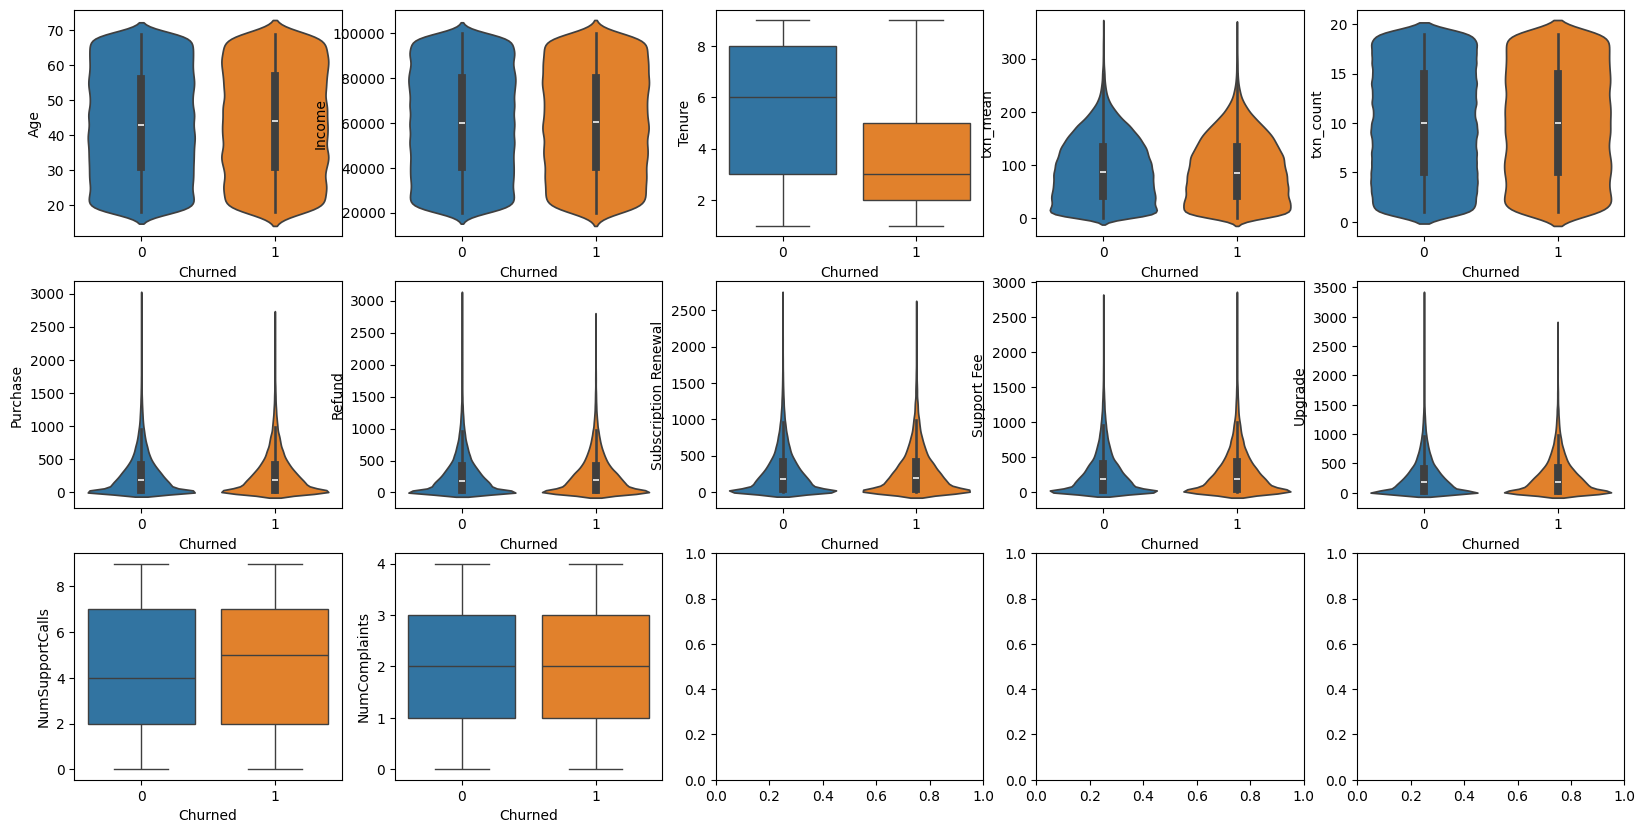

In [54]:
# Visualise Numeric
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
sns.violinplot(data=df_group, x='Churned', y='Age', hue='Churned', ax=axs[0][0], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Income', hue='Churned', ax=axs[0][1], legend=False)
sns.boxplot(data=df_group, x='Churned', y='Tenure', hue='Churned', ax=axs[0][2], legend=False)
sns.violinplot(data=df_group, x='Churned', y='txn_mean', hue='Churned', ax=axs[0][3], legend=False)
sns.violinplot(data=df_group, x='Churned', y='txn_count', hue='Churned', ax=axs[0][4], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Purchase', hue='Churned', ax=axs[1][0], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Refund', hue='Churned', ax=axs[1][1], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Subscription Renewal', hue='Churned', ax=axs[1][2], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Support Fee', hue='Churned', ax=axs[1][3], legend=False)
sns.violinplot(data=df_group, x='Churned', y='Upgrade', hue='Churned', ax=axs[1][4], legend=False)
sns.boxplot(data=df_group, x='Churned', y='NumSupportCalls', hue='Churned', ax=axs[2][0], legend=False)
sns.boxplot(data=df_group, x='Churned', y='NumComplaints', hue='Churned', ax=axs[2][1], legend=False)

In [29]:
df_ori = df_group

In [30]:
# Summary statistics for numerical
df_ori.groupby('Churned')[l_cols_num].agg(
    {i: ['mean', 'median', 'var'] for i in l_cols_num}
    )

Age                           Income                         \
              mean median         var          mean   median           var   
Churned                                                                      
0        43.456314   43.0  224.360190  60063.440825  60123.0  5.322275e+08   
1        43.612864   44.0  223.526582  60325.224589  60406.5  5.317726e+08   

           Tenure                  NumSupportCalls                   \
             mean median       var            mean median       var   
Churned                                                               
0        5.454868    6.0  6.432475        4.490629    4.0  8.249332   
1        3.816262    3.0  5.218901        4.507265    5.0  8.261425   

        NumComplaints                     Purchase                          \
                 mean median       var        mean   median            var   
Churned                                                                      
0            1.996246    2.0  1.995481  276.604625  182.705   96008.819541   
1            1.996118    2.0  2.002870  282.912485  186.095  100470.778842   

             Refund                        Subscription Renewal           \
               mean   median           var                 mean   median   
Churned                                                                    
0        277.932324  182.310  97043.741720           276.922737  180.770   
1        280.272901  188.165  98176.642309           283.953971  190.545   

                      Support Fee                             Upgrade  \
                  var        mean   median            var        mean   
Churned                                                                 
0        97758.812822  277.467663  180.915   98012.663486  278.004944   
1        98873.832609  287.137684  191.840  100947.141799  284.618904   

                                  txn_mean                     txn_count  \
          median            var       mean median          var      mean   
Churned                                                                    
0        181.395   97860.774562  91.713640   86.5  3469.894357  9.978685   
1        189.525  101589.874085  91.254398   86.0  3443.168401  9.970226   

                           
        median        var  
Churned                    
0         10.0  29.926785  
1         10.0  29.903021

In [32]:
# Hypothesis tests
n = 10000
seed = 12345
sl = 0.05
d_test = {'columns': l_cols_num, 'churned': [], 'notchurned':[], 'difference': [], 'pval':[], 'outcome':[]}

for col in l_cols_num:
    l_churned = list(df_ori.loc[df_ori['Churned']==1, col].sample(n=n, random_state=seed))
    l_notchurned = list(df_ori.loc[df_ori['Churned']==0, col].sample(n=n, random_state=seed))

    mean_churned = round(np.mean(l_churned), 2)
    mean_notchurned = round(np.mean(l_notchurned), 2)

    pval = t_test(l_notchurned,l_churned, alternative='both', var=False)

    if pval < sl:
        pval_g = t_test(l_churned,l_notchurned, alternative='greater', var=False)
        if pval_g < sl:
            pval_final = pval_g
            outcome = 'greater'
        else:
            pval_l = t_test(l_churned,l_notchurned, alternative='less', var=False)
            if pval_l < sl:
                pval_final = pval_l
                outcome = 'less'
    else:
        pval_final = pval
        outcome = 'no difference'

    # Store in dict
    d_test['churned'].append(mean_churned)
    d_test['notchurned'].append(mean_notchurned)
    d_test['difference'].append(abs(mean_churned-mean_notchurned))
    d_test['pval'].append(pval_final)
    d_test['outcome'].append(outcome)

pd.DataFrame(d_test)


,columns,churned,notchurned,difference,pval,outcome
0,Age,43.76,43.37,0.39,0.064747,no difference
1,Income,60527.01,60164.71,362.30,0.267160,no difference
2,Tenure,3.83,5.45,1.62,0.000000,less
3,NumSupportCalls,4.54,4.47,0.07,0.080509,no difference
4,NumComplaints,1.99,2.02,0.03,0.169952,no difference
5,Purchase,280.20,278.98,1.22,0.781206,no difference
6,Refund,279.44,277.10,2.34,0.593559,no difference
7,Subscription Renewal,285.00,275.68,9.32,0.017295,greater
8,Support Fee,288.56,276.69,11.87,0.003610,greater
9,Upgrade,283.44,280.93,2.51,0.572812,no difference


<Axes: >

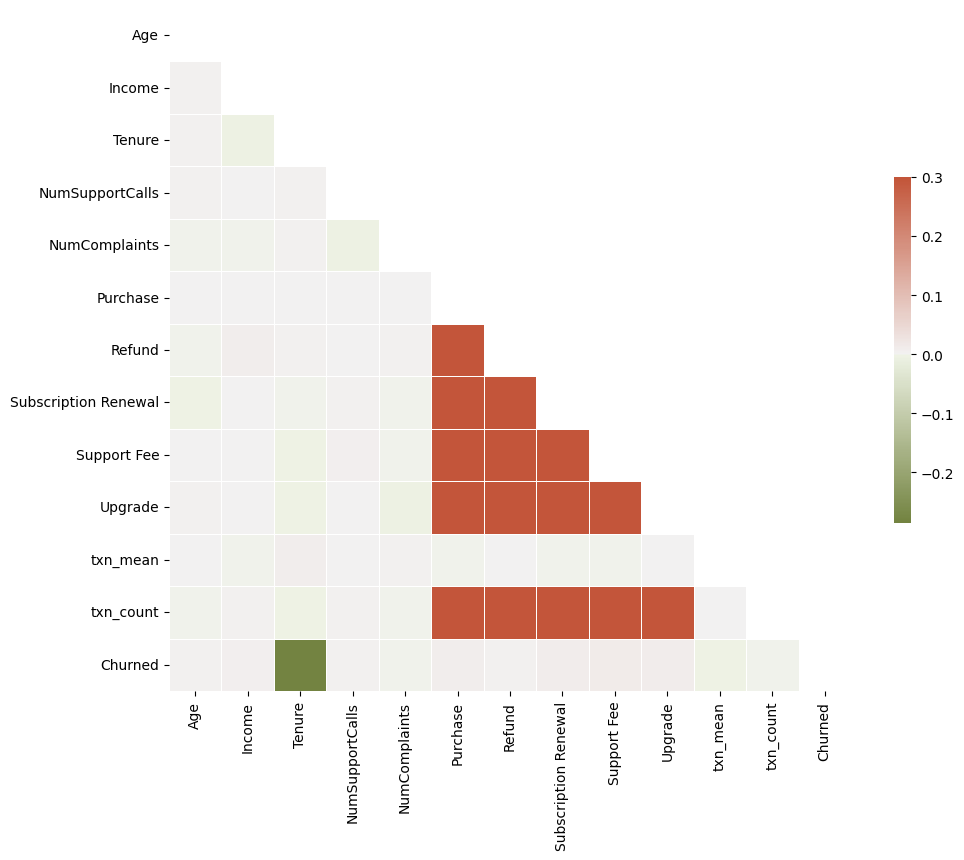

In [33]:
# Correlations
corr = df_ori[l_cols_num + ['Churned']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
corr

,Age,Income,Tenure,NumSupportCalls,NumComplaints,Purchase,Refund,Subscription Renewal,Support Fee,Upgrade,txn_mean,txn_count,Churned
Age,1.000000,0.003992,0.004567,0.003081,-0.001181,0.001067,-0.001243,-0.003560,0.000572,0.002478,0.001126,-0.001697,0.004699
Income,0.003992,1.000000,-0.004775,0.001642,-0.001296,0.002358,0.008504,0.002460,0.002415,0.001103,-0.001447,0.004175,0.005100
Tenure,0.004567,-0.004775,1.000000,0.003546,0.003492,0.000795,0.004073,-0.002031,-0.002291,-0.003395,0.008534,-0.002482,-0.285895
NumSupportCalls,0.003081,0.001642,0.003546,1.000000,-0.005707,0.001598,0.001413,0.004357,0.005249,0.000997,0.001555,0.004032,0.002602
NumComplaints,-0.001181,-0.001296,0.003492,-0.005707,1.000000,0.002251,0.003513,-0.000082,-0.001189,-0.004489,0.003368,-0.001405,-0.000041
Purchase,0.001067,0.002358,0.000795,0.001598,0.002251,1.000000,0.364545,0.362843,0.363904,0.359622,-0.001604,0.488582,0.009089
Refund,-0.001243,0.008504,0.004073,0.001413,0.003513,0.364545,1.000000,0.370600,0.363367,0.365576,0.001824,0.490833,0.003371
Subscription Renewal,-0.003560,0.002460,-0.002031,0.004357,-0.000082,0.362843,0.370600,1.000000,0.362568,0.370727,-0.001694,0.491513,0.010089
Support Fee,0.000572,0.002415,-0.002291,0.005249,-0.001189,0.363904,0.363367,0.362568,1.000000,0.360973,-0.000810,0.487874,0.013821
Upgrade,0.002478,0.001103,-0.003395,0.000997,-0.004489,0.359622,0.365576,0.370727,0.360973,1.000000,0.000815,0.489388,0.009450


<Axes: xlabel='NumComplaints', ylabel='Count'>

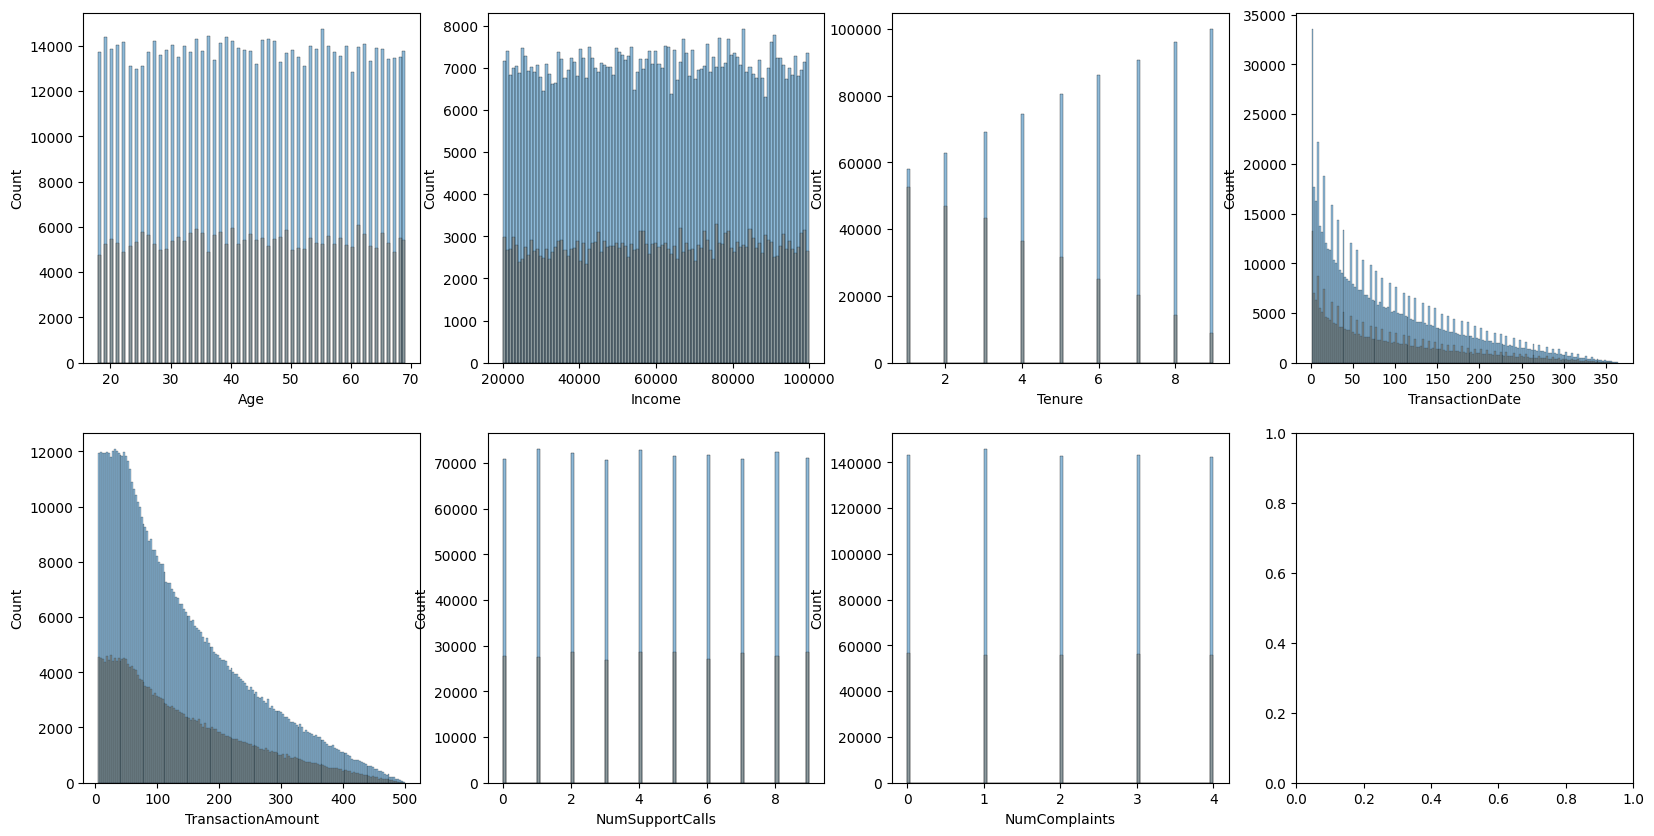

In [10]:
# Numeric Histograms
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
sns.histplot(data=df_ori, x='Age', hue='Churned', ax=axs[0][0], legend=False)
sns.histplot(data=df_ori, x='Income', hue='Churned', ax=axs[0][1], legend=False)
sns.histplot(data=df_ori, x='Tenure', hue='Churned', ax=axs[0][2], legend=False)
sns.histplot(data=df_ori, x='TransactionDate', hue='Churned', ax=axs[0][3], legend=False)
sns.histplot(data=df_ori, x='TransactionAmount', hue='Churned', ax=axs[1][0], legend=False)
sns.histplot(data=df_ori, x='NumSupportCalls', hue='Churned', ax=axs[1][1], legend=False)
sns.histplot(data=df_ori, x='NumComplaints', hue='Churned', ax=axs[1][2], legend=False)

## 3. Pre-Processing

### 3.1. Outliers

In [35]:
df_ori.groupby('Churned')[l_cols_num].agg(
    {i: ['mean', 'min', 'median', 'max'] for i in l_cols_num}
    )

Age                       Income                         \
              mean min median max          mean    min   median    max   
Churned                                                                  
0        43.456314  18   43.0  69  60063.440825  20000  60123.0  99999   
1        43.612864  18   44.0  69  60325.224589  20003  60406.5  99998   

           Tenure                NumSupportCalls                NumComplaints  \
             mean min median max            mean min median max          mean   
Churned                                                                         
0        5.454868   1    6.0   9        4.490629   0    4.0   9      1.996246   
1        3.816262   1    3.0   9        4.507265   0    5.0   9      1.996118   

                          Purchase                             Refund       \
        min median max        mean  min   median      max        mean  min   
Churned                                                                      
0         0    2.0   4  276.604625  0.0  182.705  2961.35  277.932324  0.0   
1         0    2.0   4  282.912485  0.0  186.095  2653.51  280.272901  0.0   

                          Subscription Renewal                         \
          median      max                 mean  min   median      max   
Churned                                                                 
0        182.310  3072.53           276.922737  0.0  180.770  2690.22   
1        188.165  2723.97           283.953971  0.0  190.545  2551.89   

        Support Fee                            Upgrade                         \
               mean  min   median      max        mean  min   median      max   
Churned                                                                         
0        277.467663  0.0  180.915  2755.84  278.004944  0.0  181.395  3359.02   
1        287.137684  0.0  191.840  2780.40  284.618904  0.0  189.525  2830.74   

          txn_mean                    txn_count                 
              mean  min median    max      mean min median max  
Churned                                                         
0        91.713640  1.0   86.5  360.0  9.978685   1   10.0  19  
1        91.254398  1.0   86.0  355.0  9.970226   1   10.0  19

In [36]:
# Using IQR
df_ori_iqr = df_ori.copy()

for col in l_cols_num:
    Q1 = df_ori[col].quantile(0.25)
    Q3 = df_ori[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = int(Q1 - 1.5*IQR)
    upper = int(Q3 + 1.5*IQR)

    UQ = df_ori.loc[df_ori[col] > upper, col]
    LQ = df_ori.loc[df_ori[col] < lower, col]

    print(f"{col}: UQ({Q3}): {len(UQ)}({round(np.mean(UQ), 2)}) LQ({Q1}): {len(LQ)}({round(np.mean(LQ), 2)})")

    # Replace
    df_ori_iqr.loc[df_ori_iqr[col] > upper, col] = upper
    df_ori_iqr.loc[df_ori_iqr[col] < lower, col] = lower

df_ori_iqr.groupby('Churned')[l_cols_num].agg(
    {i: ['mean', 'min', 'median', 'max'] for i in l_cols_num}
    )

Age: UQ(56.0): 0(nan) LQ(31.0): 0(nan)
Income: UQ(80021.25): 0(nan) LQ(40224.75): 0(nan)
Tenure: UQ(7.0): 0(nan) LQ(3.0): 0(nan)
NumSupportCalls: UQ(7.0): 0(nan) LQ(2.0): 0(nan)
NumComplaints: UQ(3.0): 0(nan) LQ(1.0): 0(nan)
Purchase: UQ(408.275): 4171(1242.68) LQ(34.86): 0(nan)
Refund: UQ(408.7925): 4107(1244.53) LQ(34.2225): 0(nan)
Subscription Renewal: UQ(408.6125): 4171(1247.52) LQ(34.73): 0(nan)
Support Fee: UQ(409.54249999999996): 4310(1241.84) LQ(35.01): 0(nan)
Upgrade: UQ(410.92): 4145(1253.44) LQ(35.01): 0(nan)
txn_mean: UQ(134.2): 305(298.5) LQ(42.298529411764704): 0(nan)
txn_count: UQ(15.0): 0(nan) LQ(5.0): 0(nan)


Age                       Income                         \
              mean min median max          mean    min   median    max   
Churned                                                                  
0        43.456314  18   43.0  69  60063.440825  20000  60123.0  99999   
1        43.612864  18   44.0  69  60325.224589  20003  60406.5  99998   

           Tenure                NumSupportCalls                NumComplaints  \
             mean min median max            mean min median max          mean   
Churned                                                                         
0        5.454868   1    6.0   9        4.490629   0    4.0   9      1.996246   
1        3.816262   1    3.0   9        4.507265   0    5.0   9      1.996118   

                          Purchase                           Refund       \
        min median max        mean  min   median    max        mean  min   
Churned                                                                    
0         0    2.0   4  265.437000  0.0  182.705  968.0  266.769817  0.0   
1         0    2.0   4  270.715063  0.0  186.095  968.0  268.710331  0.0   

                        Subscription Renewal                      Support Fee  \
          median    max                 mean  min   median    max        mean   
Churned                                                                         
0        182.310  970.0           265.372412  0.0  180.770  969.0  265.969931   
1        188.165  970.0           272.166029  0.0  190.545  969.0  275.014618   

                                 Upgrade                        txn_mean       \
         min   median    max        mean  min   median    max       mean  min   
Churned                                                                         
0        0.0  180.915  971.0  266.703785  0.0  181.395  974.0  91.630120  1.0   
1        0.0  191.840  971.0  272.315167  0.0  189.525  974.0  91.180442  1.0   

                      txn_count                 
        median    max      mean min median max  
Churned                                         
0         86.5  272.0  9.978685   1   10.0  19  
1         86.0  272.0  9.970226   1   10.0  19

In [37]:
# Using 2SD
df_ori_2sd = df_ori.copy()

for col in l_cols_num:
    mean = df_ori[col].mean()
    sd = df_ori[col].std()
    lower = int(mean - (2*sd))
    upper = int(mean + (2*sd))

    UQ = df_ori.loc[df_ori[col] > upper, col]
    LQ = df_ori.loc[df_ori[col] < lower, col]

    print(f"{col}: +2SD({Q3}): {len(UQ)}({round(np.mean(UQ), 2)}) -2SD({Q1}): {len(LQ)}({round(np.mean(LQ), 2)})")

    # Replace
    df_ori_2sd.loc[df_ori_2sd[col] > upper, col] = upper
    df_ori_2sd.loc[df_ori_2sd[col] < lower, col] = lower

df_ori_2sd.groupby('Churned')[l_cols_num].agg(
    {i: ['mean', 'min', 'median', 'max'] for i in l_cols_num}
    )

Age: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)
Income: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)
Tenure: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)
NumSupportCalls: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)
NumComplaints: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)
Purchase: +2SD(15.0): 5181(1182.31) -2SD(5.0): 0(nan)
Refund: +2SD(15.0): 5211(1178.9) -2SD(5.0): 0(nan)
Subscription Renewal: +2SD(15.0): 5198(1185.98) -2SD(5.0): 0(nan)
Support Fee: +2SD(15.0): 5312(1184.67) -2SD(5.0): 0(nan)
Upgrade: +2SD(15.0): 5190(1190.22) -2SD(5.0): 0(nan)
txn_mean: +2SD(15.0): 2671(236.92) -2SD(5.0): 0(nan)
txn_count: +2SD(15.0): 0(nan) -2SD(5.0): 0(nan)


Age                       Income                         \
              mean min median max          mean    min   median    max   
Churned                                                                  
0        43.456314  18   43.0  69  60063.440825  20000  60123.0  99999   
1        43.612864  18   44.0  69  60325.224589  20003  60406.5  99998   

           Tenure                NumSupportCalls                NumComplaints  \
             mean min median max            mean min median max          mean   
Churned                                                                         
0        5.454868   1    6.0   9        4.490629   0    4.0   9      1.996246   
1        3.816262   1    3.0   9        4.507265   0    5.0   9      1.996118   

                          Purchase                           Refund       \
        min median max        mean  min   median    max        mean  min   
Churned                                                                    
0         0    2.0   4  262.438032  0.0  182.705  902.0  263.595483  0.0   
1         0    2.0   4  267.477564  0.0  186.095  902.0  265.606127  0.0   

                        Subscription Renewal                      Support Fee  \
          median    max                 mean  min   median    max        mean   
Churned                                                                         
0        182.310  902.0           262.406735  0.0  180.770  905.0  263.018255   
1        188.165  902.0           269.120212  0.0  190.545  905.0  271.997259   

                                 Upgrade                        txn_mean       \
         min   median    max        mean  min   median    max       mean  min   
Churned                                                                         
0        0.0  180.915  909.0  263.682575  0.0  181.395  908.0  90.947499  1.0   
1        0.0  191.840  909.0  269.139776  0.0  189.525  908.0  90.560429  1.0   

                      txn_count                 
        median    max      mean min median max  
Churned                                         
0         86.5  209.0  9.978685   1   10.0  19  
1         86.0  209.0  9.970226   1   10.0  19

In [38]:
# Using 3SD
df_ori_3sd = df_ori.copy()

for col in l_cols_num:
    mean = df_ori[col].mean()
    sd = df_ori[col].std()
    lower = int(mean - (3*sd))
    upper = int(mean + (3*sd))

    UQ = df_ori.loc[df_ori[col] > upper, col]
    LQ = df_ori.loc[df_ori[col] < lower, col]

    print(f"{col}: +3SD({Q3}): {len(UQ)}({round(np.mean(UQ), 2)}) -3SD({Q1}): {len(LQ)}({round(np.mean(LQ), 2)})")

    # Replace
    df_ori_3sd.loc[df_ori_3sd[col] > upper, col] = upper
    df_ori_3sd.loc[df_ori_3sd[col] < lower, col] = lower

df_ori_3sd.groupby('Churned')[l_cols_num].agg(
    {i: ['mean', 'min', 'median', 'max'] for i in l_cols_num}
    )

Age: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)
Income: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)
Tenure: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)
NumSupportCalls: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)
NumComplaints: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)
Purchase: +3SD(15.0): 1811(1462.14) -3SD(5.0): 0(nan)
Refund: +3SD(15.0): 1725(1476.66) -3SD(5.0): 0(nan)
Subscription Renewal: +3SD(15.0): 1782(1476.84) -3SD(5.0): 0(nan)
Support Fee: +3SD(15.0): 1805(1469.34) -3SD(5.0): 0(nan)
Upgrade: +3SD(15.0): 1771(1483.77) -3SD(5.0): 0(nan)
txn_mean: +3SD(15.0): 353(294.65) -3SD(5.0): 0(nan)
txn_count: +3SD(15.0): 0(nan) -3SD(5.0): 0(nan)


Age                       Income                         \
              mean min median max          mean    min   median    max   
Churned                                                                  
0        43.456314  18   43.0  69  60063.440825  20000  60123.0  99999   
1        43.612864  18   44.0  69  60325.224589  20003  60406.5  99998   

           Tenure                NumSupportCalls                NumComplaints  \
             mean min median max            mean min median max          mean   
Churned                                                                         
0        5.454868   1    6.0   9        4.490629   0    4.0   9      1.996246   
1        3.816262   1    3.0   9        4.507265   0    5.0   9      1.996118   

                          Purchase                            Refund       \
        min median max        mean  min   median     max        mean  min   
Churned                                                                     
0         0    2.0   4  272.231926  0.0  182.705  1214.0  273.574500  0.0   
1         0    2.0   4  278.108342  0.0  186.095  1214.0  275.299023  0.0   

                         Subscription Renewal                        \
          median     max                 mean  min   median     max   
Churned                                                               
0        182.310  1214.0           272.336042  0.0  180.770  1218.0   
1        188.165  1214.0           279.275466  0.0  190.545  1218.0   

        Support Fee                           Upgrade                        \
               mean  min   median     max        mean  min   median     max   
Churned                                                                       
0         273.14925  0.0  180.915  1223.0  273.543397  0.0  181.395  1223.0   
1         282.36363  0.0  191.840  1223.0  279.599069  0.0  189.525  1223.0   

          txn_mean                    txn_count                 
              mean  min median    max      mean min median max  
Churned                                                         
0        91.616123  1.0   86.5  268.0  9.978685   1   10.0  19  
1        91.169078  1.0   86.0  268.0  9.970226   1   10.0  19

## 4. Export

In [41]:
# Choose 3sd as it has the most spread - outliers not significantly different by churn
for col in l_cols_num:
    df_ori_3sd[col] = df_ori_3sd[col].astype(float)
df_ori_3sd.head()

,Age,Gender,Income,Tenure,Location,NumSupportCalls,NumComplaints,Churned,Purchase,Refund,Subscription Renewal,Support Fee,Upgrade,txn_mean,txn_count
0,56.0,Female,91512.0,4.0,Urban,2.0,3.0,0,705.85,446.60,304.47,278.91,440.46,11.750000,16.0
1,69.0,Female,87313.0,2.0,Urban,3.0,2.0,1,0.00,0.00,420.28,0.00,96.89,106.000000,2.0
2,46.0,Male,95615.0,2.0,Suburban,4.0,3.0,1,241.31,314.55,206.98,95.22,407.96,48.000000,12.0
3,32.0,Male,89271.0,8.0,Rural,1.0,0.0,1,291.22,1011.06,93.01,383.95,331.68,101.300000,10.0
4,60.0,Male,68751.0,8.0,Suburban,8.0,0.0,0,0.00,0.00,0.00,160.62,109.94,23.333333,3.0


In [42]:
df_ori_3sd.to_csv(fr"{dataout}//{dataset}_EDA.csv", index=False)